# S10_T01_Aprenentatge_Supervisat

### Ex1: Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0)


In [2]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
import sklearn
import imblearn

#Importem altres llibreries (Decision Tree Classifier, train_test_split, metrics module for accuracy calculation)
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from lazypredict.Supervised import LazyClassifier
from sklearn import datasets

In [6]:
#carreguem dataset DelayedFlights.csv
pd.set_option("display.max_columns", None)
data_frame = pd.read_csv("C:/Users/Beth/Python_Projects/Tasks_Sprint2/Task5/DelayedFlights.csv")
data_frame.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Mirem les columnes
data_frame.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
#un cop tenim les dades, estudiem i identifiquem nan values or anormality values, wrong or duplicates values
#per veure tot això, comprovem els valors estadístics de les nostres dades
data_frame.shape

(1936758, 30)

In [9]:
#valors estadistics de les dades
pd.set_option("display.max_columns", None)
data_frame.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [10]:
#comprovem duplicates i si n'hi ha els eliminem
sum(data_frame.duplicated())

0

In [11]:
data_frame.shape

(1936758, 30)

In [12]:
data_frame.head(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [13]:
#transformarem ArrDelay en atribut binari per poder fer la predicció de si ha arribat tard o no! 
#amb això obtenim la variable target del nostre model
#si ha arribat tard, ArrDelay serà >0, i sinó ArrDelay<0

In [8]:
#creem una columna nova "Delay" booleana, en funció de si hi ha hagut retard o no

Delay = []
for ArrDelay in data_frame["ArrDelay"]:
    if ArrDelay > 0.0:
        Delay.append("1")
    else:
        Delay.append("0")
data_frame["Delay"] = Delay

data_frame.head(20)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,1
6,10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,1
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,1


In [15]:
data_frame.Delay.value_counts(normalize = True)

1    0.889845
0    0.110155
Name: Delay, dtype: float64

In [16]:
#Observem que tenim una variable target molt imbalanced(descompensada), amb el que necessitarem aplicar alguna tècnica de sample per 
#balancejar les dades, això vol dir, que les dades presenten una distribució desigual de cada classe(en el nostre cas seria Delayed o no!)
#això afectarà a les nostres prediccions que estarn marcades per un biaix important
#utilitzaré la tècnica SMOTE(Synthetic Minority Over-Sampling Technique) to oversample the dataset: el que fa és analitzar l'espai de 
#característiques pels punts de dades de la classe menor i té en compte els seus veïns més propers

In [9]:
#abans de fer SMOTE eliminem les variables no numèriques de les nostres dades
#o tb les podem transformar en dades numèriques amb getdummies però en aquest cas obtindrem un dataframe massa gran en 
#nombre de columnes, i no ens interessa per poder fer la nostra predicció
data_frame.drop(["Unnamed: 0","Year","UniqueCarrier", "TailNum", "Origin", "Dest", "CancellationCode"], axis=1, inplace=True)
data_frame.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,0
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN,1
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,1
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [18]:
#Comprovem valors nan i eliminem files on ArrDelay sigui nan ja que ArrDelay és la nostra variable target
#també es podrien substituir per altres valors però per aquest exercici ja ens va bé eliminar-los
data_frame.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Delay                     0
dtype: int64

In [10]:
data_frame.dropna(subset = ["ArrDelay"], inplace = True)
data_frame.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,0
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,1
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN,1
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0,1
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [20]:
#comprovem que ja no tenim valors nan en ArrDelay
data_frame.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
Delay                     0
dtype: int64

In [11]:
data_frame.shape

(1928371, 24)

In [12]:
# Com que el mètode SMOTE dona error si hi ha atributs amb nan values, abans haurem de tractar els atributs "CarrierDelay", 
#"WeatherDelay","NASDelay", "SecurityDelay", "LateAircraftDelay" q presenten encara nan values. 
#Eliminarem aquestes columnes, tot i que amb més temps podriem tractar-les d'alguna manera per evitar perdre les dades 
#que potser d'alguna manera ens faran variar la nostra predicció!

data_frame.drop(["CarrierDelay", "WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"], axis=1, inplace=True)
data_frame.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Delay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,0
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,113.0,2.0,19.0,810,5.0,10.0,0,0,1
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,76.0,14.0,8.0,515,3.0,17.0,0,0,1
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,1
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,87.0,11.0,25.0,688,4.0,10.0,0,0,1


In [13]:
data_frame.shape

(1928371, 19)

#Abans de fer SMOTE, com que tenim moltes dades, agafarem una mostra simple, ja que al fer SMOTE l'oversampling farà que tinguem encara més dades, i ja està trigant massa temps en realitzar càlculs. Així reduïm nombre de dades i poedem reduir temps de càlculs...

In [14]:
data_frame_sample = data_frame.sample(frac=0.25,random_state=4)
data_frame_sample.shape

(482093, 19)

In [25]:
data_frame_sample.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,Delay
578340,4,6,7,1549.0,1540,1723.0,1655,2375,94.0,75.0,55.0,28.0,9.0,267,9.0,30.0,0,0,1
1419494,8,7,4,1135.0,1125,1456.0,1445,34,141.0,140.0,116.0,11.0,10.0,861,12.0,13.0,0,0,1
1529711,10,11,6,837.0,830,844.0,845,1973,67.0,75.0,53.0,-1.0,7.0,358,7.0,7.0,0,0,0
1690918,11,22,6,2248.0,2135,17.0,2307,221,149.0,152.0,133.0,70.0,73.0,910,7.0,9.0,0,0,1
543938,3,12,3,1141.0,1135,1231.0,1235,1938,50.0,60.0,37.0,-4.0,6.0,204,3.0,10.0,0,0,0


In [15]:
#comprovem que seguim tenint aprox el mateix desbalanceig, és a dir podem treballar amb la mostra
data_frame_sample.Delay.value_counts(normalize = True)

1    0.894056
0    0.105944
Name: Delay, dtype: float64

In [ ]:
#ara ja podem fer el mostreig aleatori i SMOTE

from imblearn.over_sampling import SMOTE

#en el nostre cas, el target ja em comentat que és la Classe Delay que hem creat
#fem split test-train

X = data_frame_sample.drop(["Delay"], axis=1)
y = data_frame_sample["Delay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

sm = SMOTE(sampling_strategy = "auto", random_state=7)

# Fit the model to generate the data
sm_X_train, sm_y_train = sm.fit_resample(X_train, y_train)

In [167]:
sm_X_train.shape

(646930, 18)

In [168]:
sm_y_train.shape

(646930,)

In [169]:
sm_train = pd.concat([pd.DataFrame(sm_y_train), pd.DataFrame(sm_X_train)], axis=1)
sm_train.head()

,Delay,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1,5,9,5,2304.0,2150,646.0,558,1803,282.0,308.0,256.0,48.0,74.0,2454,6.0,20.0,0,0
1,1,11,6,4,1753.0,1520,2121.0,1825,1768,148.0,125.0,92.0,176.0,153.0,678,11.0,45.0,0,0
2,1,12,25,4,2151.0,2024,28.0,2311,703,157.0,167.0,137.0,77.0,87.0,925,6.0,14.0,0,0
3,1,1,27,7,1543.0,1500,1735.0,1654,4303,52.0,54.0,34.0,41.0,43.0,151,9.0,9.0,0,0
4,1,6,29,7,2301.0,2120,2345.0,2213,1454,104.0,113.0,88.0,92.0,101.0,667,3.0,13.0,0,0


In [170]:
sm_train.Delay.value_counts(normalize = True)

1    0.5
0    0.5
Name: Delay, dtype: float64

In [ ]:
#podem observar que tenim les dades balancejades... 
#Ara ja podem començar a crear els mètodes i assegurar una bona predicció de si hi ha retards o no en els vols

##### Primer model: Regressió Logística

In [91]:
#Logistic Regression model en training set
from sklearn.linear_model import LogisticRegression

# cridem el model
log_reg = LogisticRegression(solver = "liblinear")

# fit model
log_reg.fit(sm_X_train, sm_y_train)

LogisticRegression(solver='liblinear')

In [93]:
# fem predictions for the testing set
y_pred = log_reg.predict(X_test)

In [ ]:
#anem a mirar les diferents mètriques per avaluar el model
#Precisio (Accuracy)
#Matriu de confussió
#Altres mètriques més avançades (Precision and recall, F1 score, Sensitivity and Specifity, ROC curve and AUC)

In [94]:
# calculem Classificació precisió (accuracy): percentatge de prediccions correctes
print(metrics.accuracy_score(y_test, y_pred))

0.9999585144867412


In [95]:
#Avaluarem el model utilitzant Confusion Matrix: taula q ens descriu el rendiment d'un model de classificació
#Ja que sabem que la mesura de la Precissió(Accuracy) no és la millor per avaluar bé un model

In [96]:
# IMPORTANT: first argument is true values, second argument is predicted values!!
# this produces a 2x2 numpy array (matrix) ja que el model és de classificació binària
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 12971      0]
 [     5 107548]]


Tenim dues classes 0 i 1, els valors de la diagonal representen prediccions precises(12971 i 107548), mentres que els altres elements són prediccions inexactes o incorrectes(0 i 5)
Podriem dir que en el nostre cas amb el model de Regressió Logística, tenim una bona predicció, ja que tenim un nombre elevat de prediccions precisses(12971 + 107548), i molt poques de inexactes o incorrectes (0 + 5)

Text(0.5, 257.44, 'Predicted label')

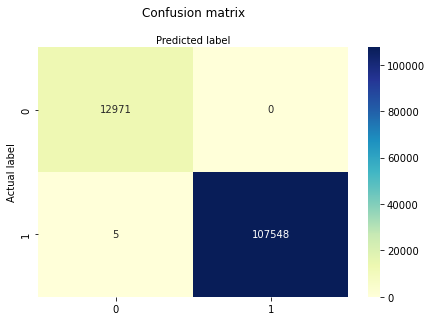

In [97]:
#fem visualització de la matriu utilitzant un heatmap  
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

**Evaluation Metrics computed from a confusion matrix**

 **Classification Accuracy:** Overall, how often is the classifier correct?
 
 **Precision:** When a positive value is predicted, how often is the prediction correct?


In [98]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999585144867412


In [99]:
print("Precision:", metrics.precision_score(y_test, y_pred, pos_label="0"))

Precision: 0.99961467324291


Many other metrics can be computed: F1 score, Recall score, Matthews correlation coefficient, etc.

In [100]:
# F1 score: promig ponderat de precissió i recall
metrics.f1_score(y_test, y_pred, pos_label="1")

0.999976755105741

In [101]:
# recall score: nombre de possitius reals dividit pel nombre de valors possitius en les dades de prova. Tb conegut com Sensibilitat o
# tasa de verdaderos positivos. Si el valor és baix, indica q hi ha molts falsos negatius
metrics.recall_score(y_test, y_pred, pos_label="1")

0.9999535112921072

##### Podem observar els resultats de les metriques obtinguts:
Tenim una accuracy score de 99,99%, amb el que podem dir que és un molt bon resultat, per tant, aquest mètode de classificació triat, per les nostres dades és molt bó!
La Precissió és del 99,96%, és a dir, quan amb el nostre model de Regressió Logistica fem una predicció de si hi haurà un delay, encertem en un 99,96% de les vegades!
Recall = ens diu que si hi ha vols amb retard en el nostre grup de dades de test, el model de Regressió Logistica creat pot identificar-los en un 99,99% de les vegades

#ROC Curve(Receiver Operating Characteristic) and AUC(Area Under the Curve)
És una de les mètriques d'avaluació més importants per comprovar el rendiment de qualsevol model de classificació
ROC: és un gràfic de la tasa de positius reals i la de falsos positius, representació gràfica de la sensibilitat davant de l'especificitat per a un sistema classificador binari segons es varia el llindar de discriminació

Un model excel·lent té un AUC proper a l'1, significa que té una bona mesura de separabilitat

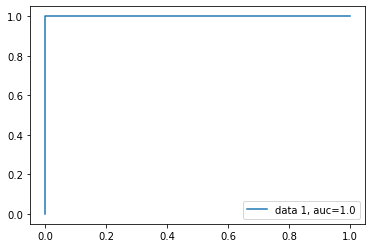

In [102]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label= "1")
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#En el nostre model, observem que AUC = 1.0, això voldria dir que el nostre model és molt bó ja que el model és perfectament capaç de diferenciar entre la classe possitiva i la negativa

Segurament si enlloc de triar com adades totes les propietats haguessim estudiat com predir que els vols tenien retard en funció de DeptTime, Distance, AirTime, per exemple, el model no ens hagues donat uns valors així de bons. Per manca de temps, no faré aquesta comprovació sinó que crearé altres models basant-me an aquests paràmetres per veure com surten!

In [158]:
#Ex2 #entrenem utilitzant diferents paràmetres
#comprovació de paràmetres utilitzats
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 8,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [165]:
#modificaré el random_state que veig que l'he fet servir a None, i penalty="elasticnet"(amb el q solver=saga)
# cridem el model amb els canvis de paràmetres
log_reg_2 = LogisticRegression(random_state= 8, solver = "saga", penalty = "elasticnet", l1_ratio=0.5, max_iter= 180)

# fit model
log_reg_2.fit(sm_X_train, sm_y_train)

C:\Users\Beth\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.5, max_iter=180, penalty='elasticnet',
                   random_state=8, solver='saga')

In [171]:
y_pred_lr = log_reg_2.predict(X_test)

In [172]:
#tornem a avaluar mètriques
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[ 12971      0]
 [  2883 104670]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     12971
           1       1.00      0.97      0.99    107553

    accuracy                           0.98    120524
   macro avg       0.91      0.99      0.94    120524
weighted avg       0.98      0.98      0.98    120524



En quant a valors de precissió hem millorat, però en la resta de mètriques no ha variat gaire! i la matriu de confussió presenta més valors incorrectes o inxactes. Veniem d'un mètode en el q hi havia poc a millorar degut q que els valors obtinguts abans de canviar paràmetres ja ens donaven una molt bona predicció! De fet, no hagués calgut entrenar-lo però com a pràctica és bó fer-ho!

#####  Segon model: Decission Tree Algorithm

#utilitzarem el procediment K-fold cross validation
#ens va perfecte en les nostres dades ja que tenim un dataframe bastant gran, i en quant a temps de processament ens anirà millor

#Cross-Validation
The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held-back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported The k-fold cross-validation procedure can be implemented easily using the scikit-learn machine learning library

#cross validation

#print(cross_val_score(knn, X_train, y_train, cv=4))

In [136]:
#com hem comentat abans, anem a basar-nos en algunes de les propietats per predir si hi ha retard ene els vols
X_DTA = data_frame_sample[["DepDelay", "DepTime", "Distance", "AirTime"]]
y = data_frame_sample["Delay"]

X_train, X_test, y_train, y_test = train_test_split(X_DTA, y, test_size=0.25, random_state=7)

#Decission Tree Algorithm
model_DTA = DecisionTreeClassifier(random_state = 8)
#cross validation
mod_result = cross_val_score(model_DTA, X_train, y_train, cv=10)
print("Accuracy: " , round(mod_result.mean(), 3))    
print("StdDev: " , round(mod_result.std(), 3))

Accuracy:  0.869
StdDev:  0.002


In [137]:
# fit model
model_DTA.fit(X_train, y_train)

DecisionTreeClassifier(random_state=8)

In [138]:
y_pred = model_DTA.predict(X_test)

In [139]:
#avaluem l'algoritme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5333  7638]
 [ 8250 99303]]
              precision    recall  f1-score   support

           0       0.39      0.41      0.40     12971
           1       0.93      0.92      0.93    107553

    accuracy                           0.87    120524
   macro avg       0.66      0.67      0.66    120524
weighted avg       0.87      0.87      0.87    120524



#veiem que hem obtingut unes mètriques bastant acceptables tot i que millorables, ja que tant la precissió que és d'un 87%, i el recall  f1-score són del 92 i 93 % respectivament

In [173]:
#Ex2 #entrenem utilitzant diferents paràmetres
#comprovació de paràmetres utilitzats
model_DTA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 8,
 'splitter': 'best'}

In [29]:
#Decission Tree Algorithm canviant paràmetres: splitter = random, max_depth = 20
model_DTA_2 = DecisionTreeClassifier(random_state = 8, splitter="random", max_depth=20)
#cross validation
mod_result_2 = cross_val_score(model_DTA_2, X_train, y_train, cv=10)
print("Accuracy: " , round(mod_result_2.mean(), 3))    
print("StdDev: " , round(mod_result_2.std(), 3))

Accuracy:  0.889
StdDev:  0.002


In [30]:
# fit model
model_DTA_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=8, splitter='random')

In [31]:
y_pred_DTA = model_DTA_2.predict(X_test)

In [33]:
#avaluem de nou l'algoritme amb els canvis
print(confusion_matrix(y_test, y_pred_DTA))
print(classification_report(y_test, y_pred_DTA))

[[ 2416  7809]
 [ 2889 83305]]
              precision    recall  f1-score   support

           0       0.46      0.24      0.31     10225
           1       0.91      0.97      0.94     86194

    accuracy                           0.89     96419
   macro avg       0.68      0.60      0.63     96419
weighted avg       0.87      0.89      0.87     96419



S'observa una lleugera millora del model amb els nous paràmetres! tant la precissió com les mètriques de recall i f1-score han millorat respecte els paràmetres d'abans

##### Tercer model: KNN (K-Nearest Neighbors Algorithm)

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks

In [17]:
#com hem comentat abans, anem a basar-nos en algunes de les propietats per predir si hi ha retard ene els vols
X_knn = data_frame_sample[["DepDelay", "DepTime", "Distance", "AirTime"]]
y = data_frame_sample["Delay"]

In [18]:
#generem train and test splits
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.20)

In [19]:
#feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
#entrenem i fem predicció en les dades de test
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
y_pred = classifier.predict(X_test)

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics

In [126]:
#avaluem l'algoritme
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3239  6902]
 [ 3417 82861]]
              precision    recall  f1-score   support

           0       0.49      0.32      0.39     10141
           1       0.92      0.96      0.94     86278

    accuracy                           0.89     96419
   macro avg       0.70      0.64      0.66     96419
weighted avg       0.88      0.89      0.88     96419



#Comparing Error Rate with the K Value
The above script executes a loop. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list

In [129]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

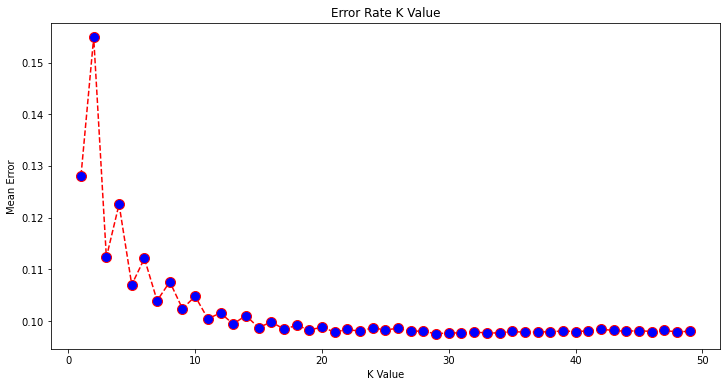

In [130]:
#The next step is to plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#a partir de k=30 fins a K=40 veiem que és quan tenim the mean error més aprop de zero, és a dir quan la predicció és gairebé perfecte!
#jugant amb el valor de K podem obtenir una predicció millor... exactament el valor més proper ens el dona K=29...variem el paràmetre 
#a aquest valor i així podem veure com afecta a la precissió de les prediccions

In [131]:
#entrenem i fem predicció en les dades de test amb el nou valor de K =29
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=29)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [132]:
y_pred = classifier.predict(X_test)

In [133]:
#avaluem de nou l'algoritme
import from sklearn.metrics  classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 2288  7853]
 [ 1548 84730]]
              precision    recall  f1-score   support

           0       0.60      0.23      0.33     10141
           1       0.92      0.98      0.95     86278

    accuracy                           0.90     96419
   macro avg       0.76      0.60      0.64     96419
weighted avg       0.88      0.90      0.88     96419



In [ ]:
#realment podem observar que la precissió ha pujat una mica, d'un 89% al 90%...i també han millorat recall i f1-score

In [174]:
#Ex2 #entrenem utilitzant diferents paràmetres
#comprovació de paràmetres utilitzats
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#de fet, ja havia entrenat aquest mètode canviant el paràmetre n_neighbors de 5 a 29, provem ara amb K=9 a veure quin resultat obtenim

In [23]:
#entrenem i fem predicció en les dades de test amb el nou valor de K=9
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=9)
classifier_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [25]:
y_pred_knn = classifier_2.predict(X_test)

In [26]:
#avaluem de nou l'algoritme
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[ 2918  7307]
 [ 2565 83629]]
              precision    recall  f1-score   support

           0       0.53      0.29      0.37     10225
           1       0.92      0.97      0.94     86194

    accuracy                           0.90     96419
   macro avg       0.73      0.63      0.66     96419
weighted avg       0.88      0.90      0.88     96419



com ja ens podiem suposar no ha millorat gaire les mètriques del model

### Ex2: Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confussió i d’altres mètriques més avançades

Els càlculs ja estan fets quan he creat cada mètode a l'exercici 1

## Comparativa entre mètodes

### Regressió Logística
* Accuracy = 99,99%
* Precision: 99,96%
* confusion matrix

    [[ 12971      0]
    
     [     5 107548]]


* recall= 99,99%
* f1-score = 99,99%



### Decission Tree Algorithm

* confusion matrix

    [[ 5333  7638]
     [ 8250 99303]]
     
     
* classification report

              precision    recall  f1-score   support

           0       0.39      0.41      0.40     12971
           1       0.93      0.92      0.93    107553
        accuracy                       0.87    120524
        macro avg  0.66      0.67      0.66    120524
        weightavg  0.87      0.87      0.87    120524
   

### KNN

* confusion matrix

    [[ 3239  6902]
     [ 3417 82861]]
     
     
* classification report

              precision    recall  f1-score   support

           0       0.49      0.32      0.39     10141
           1       0.92      0.96      0.94     86278
        accuracy                       0.90     96419
        macro avg  0.76      0.60      0.64     96419
        weightavg  0.88      0.90      0.88     96419

### Ex3: Entrena’ls utilitzant els diferents paràmetres que admeten

L'exercici per facilitat amb les dades està fet just sota cada model, hi ha el model i el seu entrenament

### Ex4: Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation

En alguns dels mètodes ja s'ha fet servir l'aproximació train/test, i en altres cross validation.

### Ex5: Realitza algun procés d’enginyeria de variables per millorar-ne la predicció 

### Ex6: No utilitzis la variable DepDelay a l’hora de fer prediccions 

#there is a handy library called lazypredict, with which you can train all the models available in scikit-learn (and more, like XGBoost and LightGBM) with a single line of code
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets